<a href="https://colab.research.google.com/github/albertost85/RoboticArm/blob/main/notebooks/dibujar_gr%C3%A1ficas_tensorboard2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalar dependencias y funciones

In [38]:
!pip install stable-baselines3[extra]

In [39]:
import os 
import glob
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common import results_plotter
from stable_baselines3.common.results_plotter import load_results, ts2xy
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Obtener los datos

In [40]:
def get_section_results(folder, title=None):
  if title == None:
    title = title=list(filter(lambda x: x != "", folder.split("/")))[-1]
  """
    requires tensorflow==1.12.0
	no sé
  """
  dataset = {"title":title}
  ev_rew = {"X":[],"Y":[]}
  ev_len = {"X":[],"Y":[]} 
  tr_rew = {"X":[],"Y":[]} 
  tr_len = {"X":[],"Y":[]} 
  for path, currentDirectory, files in os.walk(folder):
    for file in files:
      file = os.path.join(folder, file)
      for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
          if v.tag == 'rollout/ep_rew_mean':
            tr_rew["Y"].append(v.simple_value)
            tr_rew["X"].append(e.step)
          if v.tag == 'rollout/ep_len_mean':
            tr_len["Y"].append(v.simple_value)
            tr_len["X"].append(e.step)
          if v.tag == 'eval/mean_reward':
            ev_len["Y"].append(v.simple_value)
            ev_len["X"].append(e.step)
          if v.tag == 'eval/mean_ep_length':
            ev_len["Y"].append(v.simple_value)
            ev_len["X"].append(e.step)
  dataset.update({"ev_rew": {"x":np.array(ev_rew["X"]), "y":np.array(ev_rew["Y"])}, "ev_len": {"x":np.array(ev_len["X"]), "y":np.array(ev_len["Y"])}, "tr_rew": {"x":np.array(tr_rew["X"]), "y":np.array(tr_rew["Y"])}, "tr_len": {"x":np.array(tr_len["X"]), "y":np.array(tr_len["Y"])}})
  fakevec = dataset["tr_len"]["x"].argsort()
  dataset["tr_len"]["x"]=dataset["tr_len"]["x"][fakevec]
  dataset["tr_len"]["y"]=dataset["tr_len"]["y"][fakevec]
  fakevec = dataset["tr_rew"]["x"].argsort()
  dataset["tr_rew"]["x"]=dataset["tr_rew"]["x"][fakevec]
  dataset["tr_rew"]["y"]=dataset["tr_rew"]["y"][fakevec]
  fakevec = dataset["ev_len"]["x"].argsort()
  dataset["ev_len"]["x"]=dataset["ev_len"]["x"][fakevec]
  dataset["ev_len"]["y"]=dataset["ev_len"]["y"][fakevec]
  fakevec = dataset["ev_rew"]["x"].argsort()
  dataset["ev_rew"]["x"]=dataset["ev_rew"]["x"][fakevec]
  dataset["ev_rew"]["y"]=dataset["ev_rew"]["y"][fakevec]
  
  return dataset

log_path_A2C_easy_mode2=os.path.join('/content/drive/MyDrive/Colab Notebooks/A2C_easy_mode2_1')
log_path_reach_target_SAC_MlpPolicy_pi64e4_qf128e3_mode2_seed0=os.path.join('/content/drive/MyDrive/Colab Notebooks/reach_target_SAC_MlpPolicy[pi=64e4-qf=128e3]_mode2_seed=0_0')
A2C_easy_mode2 = get_section_results(log_path_A2C_easy_mode2)
reach_target_SAC_MlpPolicy_pi64e4_qf128e3_mode2_seed0 = get_section_results(log_path_reach_target_SAC_MlpPolicy_pi64e4_qf128e3_mode2_seed0)


In [41]:
## Test porque algunos ficheros se importan en orden incorrecto y quedan unas líneas raras en la gráfica.
#fakevec = reach_target_SAC_MlpPolicy_pi64e4_qf128e3_mode2_seed0["tr_len"]["x"].argsort()
#reach_target_SAC_MlpPolicy_pi64e4_qf128e3_mode2_seed0["tr_len"]["x"]=reach_target_SAC_MlpPolicy_pi64e4_qf128e3_mode2_seed0["tr_len"]["x"][fakevec]
#reach_target_SAC_MlpPolicy_pi64e4_qf128e3_mode2_seed0["tr_len"]["y"]=reach_target_SAC_MlpPolicy_pi64e4_qf128e3_mode2_seed0["tr_len"]["y"][fakevec]

# Dibujar los datos

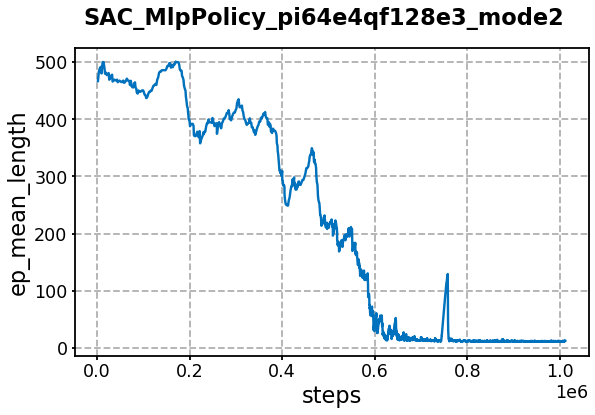

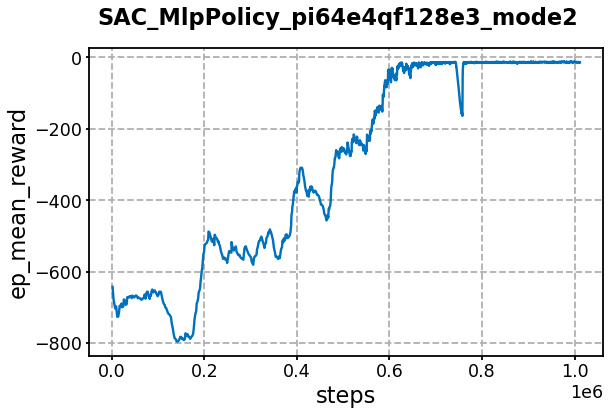

Check /content/drive/MyDrive/Colab Notebooks/Images for printed images


In [42]:
cm = 1/2.54

COLORES = np.array([[0, 0.4470, 0.7410], [0.8500, 0.3250, 0.0980],[0.9290, 0.6940, 0.1250],[0.4940, 0.1840, 0.5560],[0.4660, 0.6740, 0.1880]])
LINEWIDTH = 3*0.8
AXISWIDTH = 3*0.6
MARKERSIZE = 12
PAPERPOSITION = 3*cm*np.array([0, 0, 7.8, 4.8])
FONTTYPE = 'Times New Roman'
FONTTYPE2 = FONTTYPE
FONTSIZE_TITLE = 2.5*9
FONTSIZE_AXIS = 2.5*9
FONTSIZE_CONTOUR = 2.5*7
FONTSIZE_LEGEND = FONTSIZE_CONTOUR
FONTSTYLE = 'normal'
FONTSTYLE_TITLE = 'bold'
#PATHIMAGES = './Images' #No poner la barra al final
PATHIMAGES = '/content/drive/MyDrive/Colab Notebooks/Images'
plt.rcParams["font.family"] = FONTTYPE # global font

# Other font possible
csfont = {'fontname': FONTTYPE2}

font_grid = {'fontname': FONTTYPE2,
        'family' : 'normal',
        'weight' : 'bold',
        'size'   : FONTSIZE_CONTOUR }
plt.rc('xtick', labelsize=FONTSIZE_CONTOUR)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONTSIZE_CONTOUR)    # fontsize of the tick labels

# example: plt.title('title',**csfont)


def cute_figure(fig_x, fig_y, name="default_name", file_name = None, labels="default_label", data_name = None, time_name = 'steps'):
    if file_name == None:
      file_name = name
    if(fig_y.ndim > 1):
      dim_y = len(fig_y)
    elif fig_y.ndim == 1:
      dim_y = 1
    else:
      dim_y = 0
      
      fig_y[0] = fig_y
    if labels == "default_label":
        labels = "".join(f"Data {i}/" for i in range(dim_y))
        labels = labels.split('/')
        labels.pop()

    figure = plt.figure(figsize=(PAPERPOSITION[2], PAPERPOSITION[3]))
    figure.suptitle(name, fontsize=FONTSIZE_TITLE, fontweight=FONTSTYLE_TITLE)
    
    if dim_y > 1:
      for i in range(dim_y-1):
          plt.plot(fig_x, fig_y[0], color=COLORES[0], linewidth=LINEWIDTH, label = labels[0])
          plt.plot(fig_x, fig_y[1], color=COLORES[i+1], linewidth=LINEWIDTH, label = labels[i+1])
    else:
      plt.plot(fig_x, fig_y, color=COLORES[0], linewidth=LINEWIDTH, label = labels)

    if time_name != None:
        plt.xlabel(time_name, fontname=FONTTYPE, fontsize=FONTSIZE_AXIS, fontweight='normal')
    if data_name != None:
        plt.ylabel(data_name, fontsize=FONTSIZE_AXIS, fontweight='normal')

    ax = plt.gca()

    if labels != None:
        plt.legend(fontsize=FONTSIZE_LEGEND, shadow = True, framealpha = None)

    ax.grid(linestyle='--', linewidth=AXISWIDTH)
    # change all spines
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(AXISWIDTH)
    ax.tick_params(width=AXISWIDTH)

    if not os.path.exists(PATHIMAGES):
        os.makedirs(PATHIMAGES)

    if file_name != None:
      result = plt.savefig(f"{PATHIMAGES}/{file_name}_{data_name}.tiff", dpi=300, facecolor='w', edgecolor='w',
              orientation='portrait', format='tiff',
              transparent=False, bbox_inches=None, pad_inches=0.1)
      result = plt.savefig(f"{PATHIMAGES}/{file_name}_{data_name}.eps", facecolor='w', edgecolor='w',
                  orientation='portrait', format='eps',
                  transparent=False, bbox_inches=None, pad_inches=0.1)
    plt.show()
    return figure
#print(A2C_easy_mode2["tr_len"]["x"][-1]) Muchos steps me parecía que había
#cute_figure(A2C_easy_mode2["tr_len"]["x"], A2C_easy_mode2["tr_len"]["y"], name='A2C_easy_mode2', labels = None, data_name = 'ep_mean_length')
#cute_figure(A2C_easy_mode2["tr_rew"]["x"], A2C_easy_mode2["tr_rew"]["y"], name='A2C_easy_mode2', labels = None, data_name = 'ep_mean_reward')
cute_figure(reach_target_SAC_MlpPolicy_pi64e4_qf128e3_mode2_seed0["tr_len"]["x"], reach_target_SAC_MlpPolicy_pi64e4_qf128e3_mode2_seed0["tr_len"]["y"], name='SAC_MlpPolicy_pi64e4qf128e3_mode2', labels = None, data_name = 'ep_mean_length')
cute_figure(reach_target_SAC_MlpPolicy_pi64e4_qf128e3_mode2_seed0["tr_rew"]["x"], reach_target_SAC_MlpPolicy_pi64e4_qf128e3_mode2_seed0["tr_rew"]["y"], name='SAC_MlpPolicy_pi64e4qf128e3_mode2', labels = None, data_name = 'ep_mean_reward')
print(f"Check {PATHIMAGES} for printed images")

# Dibujar datos con errorbar (despreciado)

In [43]:
#Graficar figura con el errorbar
fig1_std = plt.figure(dpi=1000)
yerr1 = np.std(y1)
yerr2 = np.std(y2)
yerr3 = np.std(y3)
yerr4 = np.std(y4)
plt.errorbar(X1, y1, yerr1)
plt.errorbar(X2, y2, yerr2)
plt.errorbar(X3, y3, yerr3)
plt.errorbar(X4, y4, yerr4)
plt.title("CartPole_Bullet")
plt.ylabel('reward')
plt.xlabel('time steps')
#plt.legend(loc='lower right')
plt.grid()

NameError: ignored

<Figure size 6000x4000 with 0 Axes>